In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')
df_airlines = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airlines.csv')
df_airports = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airports.csv')
df_flights = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/flights.csv',
                         dtype={'ORIGIN_AIRPORT': str,
                                'DESTINATION_AIRPORT': str})

Mounted at /content/drive


In [2]:
print(df_airlines)

   IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America


In [3]:
print(df_airports)

    IATA_CODE                              AIRPORT  \
0         ABE  Lehigh Valley International Airport   
1         ABI             Abilene Regional Airport   
2         ABQ    Albuquerque International Sunport   
3         ABR            Aberdeen Regional Airport   
4         ABY   Southwest Georgia Regional Airport   
..        ...                                  ...   
317       WRG                     Wrangell Airport   
318       WYS               Westerly State Airport   
319       XNA  Northwest Arkansas Regional Airport   
320       YAK                      Yakutat Airport   
321       YUM           Yuma International Airport   

                               CITY STATE COUNTRY  LATITUDE  LONGITUDE  
0                         Allentown    PA     USA  40.65236  -75.44040  
1                           Abilene    TX     USA  32.41132  -99.68190  
2                       Albuquerque    NM     USA  35.04022 -106.60919  
3                          Aberdeen    SD     USA  45.44906

In [4]:
print(df_flights)

         YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0        2015      1    1            4      AS             98      N407AS   
1        2015      1    1            4      AA           2336      N3KUAA   
2        2015      1    1            4      US            840      N171US   
3        2015      1    1            4      AA            258      N3HYAA   
4        2015      1    1            4      AS            135      N527AS   
...       ...    ...  ...          ...     ...            ...         ...   
5819074  2015     12   31            4      B6            688      N657JB   
5819075  2015     12   31            4      B6            745      N828JB   
5819076  2015     12   31            4      B6           1503      N913JB   
5819077  2015     12   31            4      B6            333      N527JB   
5819078  2015     12   31            4      B6            839      N534JB   

        ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0  

In [5]:
df_flights['DAY'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

##Obróbka danych

In [6]:
df = df_flights.copy()
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df = df.drop(['MONTH', 'DAY', 'YEAR'], axis=1)
df

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,...,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31
5819075,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,...,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31
5819076,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,...,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31
5819077,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,...,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31


ARRIVAL_DELAY = AIR_SYSTEM_DELAY +	SECURITY_DELAY +	AIRLINE_DELAY 	LATE_AIRCRAFT_DELAY +	WEATHER_DELAY
Czyli kolumny (AIR_SYSTEM_DELAY 	SECURITY_DELAY 	AIRLINE_DELAY 	LATE_AIRCRAFT_DELAY 	WEATHER_DELAY) do usuniecia

---
####Inforamcje o danych
---
Dane w pliku Flights.csv zwierają niecałe 6 mln lotów z roku 2015. Każdy wiersz odpowiada jednemu lotowi który jest opisany według 31 kolumn.


1.   **df_flights** - (5819079x31), ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK',   'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], Brak duplikatów,


     YEAR, MONTH, DAY, DAY_OF_WEEK: dane dotyczące daty lotu
     AIRLINE: identyfikator linii lotniczej
     ORIGIN_AIRPORT and DESTINATION_AIRPORT: idendyfikatory portów lotniczych
     SCHEDULED_DEPARTURE and SCHEDULED_ARRIVAL: planowany czas odlotu/przylotu
     DEPARTURE_TIME and ARRIVAL_TIME: rzeczywisty czas odlotu/przylotu
     DEPARTURE_DELAY and ARRIVAL_DELAY: opóźnienie w minutach/różnica (w minutach) pomiędzy czasem planowanym i rzeczywistym czasem odlotu/przylotu
     DISTANCE: dystans w minutach / odległość (w milach)
                  podaje preska       a nie powinno być tak?
---

FLIGHT_NUMBER — identyfikator lotu

TAIL_NUMBER — identyfikator statku powietrznego

DEPARTURE_TIME - Godzina odlatu samolotu (WHEEL_OFF-TAXI_OUT)

DEPARTURE_DELAY — całkowite opóźnienie odlotu

TAXI_OUT – (Czas, jaki upłynął pomiędzy odlotem z bramki lotniska początkowego a odjazdem kół)

WHEELS_OFF – Godzina (Moment, w którym koła samolotu odrywają się od ziemi)

SCHEDULED_TIME — planowany czas lotu potrzebny na podróż

ELAPSED_TIME - AIR_TIME+TAXI_IN+TAXI_OUT

AIR_TIME — czas trwania pomiędzy czasem wyłączenia kół i czasem włączenia kół

WHEELS_ON – Punkt czasowy, w którym koła drona dotykają ziemi

TAXI_IN – Czas, jaki upłynął pomiędzy wjazdem na koła a przybyciem do bramki na lotnisku docelowym

ARRIVAL_TIME – WHEELS_ON+TAXI_IN

ARRIVAL_DELAY - ARRIVAL_TIME-SCHEDULED_ARRIVAL

PRZEKIEROWANO – Samolot wylądował na lotnisku niezgodnie z harmonogramem

ODWOŁANY – Lot odwołany (1 = odwołany)

CANCELLATION_REASON 98% null

Powód anulowania lotu: A - Linia lotnicza/przewoźnik; B - Pogoda; C - Krajowy System Lotniczy; D - Bezpieczeństwo

AIR_SYSTEM_DELAY – Opóźnienie spowodowane przez system powietrzny

SECURITY_DELAY – Opóźnienie spowodowane bezpieczeństwem

AIRLINE_DELAY – Opóźnienie spowodowane przez linię lotniczą

LATE_AIRCRAFT_DELAY – Opóźnienie spowodowane przez samolot

WEATHER_DELAY – Opóźnienie spowodowane pogodą

Plik Airports.csv, zawiera szegółowe informacje lotnisk:

---
2.   **df_airports** - (322x7), ['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE'], Brak duplikatów,
---
3.   **df_airlines** - (14x2), ['IATA_CODE', 'AIRLINE'], Brak duplikatów,




---




---



In [7]:
print(df_airlines.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes
None


In [8]:
print(df_airlines[df_airlines.duplicated()])

Empty DataFrame
Columns: [IATA_CODE, AIRLINE]
Index: []


In [9]:
print(df_airports.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB
None


In [10]:
print(df_airports[df_airports.duplicated()])

Empty DataFrame
Columns: [IATA_CODE, AIRPORT, CITY, STATE, COUNTRY, LATITUDE, LONGITUDE]
Index: []


In [11]:
print(df_airports.nunique())

IATA_CODE    322
AIRPORT      322
CITY         308
STATE         54
COUNTRY        1
LATITUDE     319
LONGITUDE    319
dtype: int64


In [12]:
print(df_flights.nunique())

YEAR                      1
MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
ORIGIN_AIRPORT          628
DESTINATION_AIRPORT     629
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
WHEELS_ON              1440
TAXI_IN                 185
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64


In [13]:
print(df_flights[df_flights.duplicated()])

Empty DataFrame
Columns: [YEAR, MONTH, DAY, DAY_OF_WEEK, AIRLINE, FLIGHT_NUMBER, TAIL_NUMBER, ORIGIN_AIRPORT, DESTINATION_AIRPORT, SCHEDULED_DEPARTURE, DEPARTURE_TIME, DEPARTURE_DELAY, TAXI_OUT, WHEELS_OFF, SCHEDULED_TIME, ELAPSED_TIME, AIR_TIME, DISTANCE, WHEELS_ON, TAXI_IN, SCHEDULED_ARRIVAL, ARRIVAL_TIME, ARRIVAL_DELAY, DIVERTED, CANCELLED, CANCELLATION_REASON, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY]
Index: []

[0 rows x 31 columns]


In [14]:
print(df_flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

#kolumna "YEAR" posiada tylko rok 2015 - niepotrzebna


In [15]:
rows_with_nulls = df_airports[pd.isna(df_airports.LATITUDE)]

print(rows_with_nulls)

    IATA_CODE                                            AIRPORT  \
96        ECP    Northwest Florida Beaches International Airport   
234       PBG                  Plattsburgh International Airport   
313       UST  Northeast Florida Regional Airport (St. August...   

              CITY STATE COUNTRY  LATITUDE  LONGITUDE  
96     Panama City    FL     USA       NaN        NaN  
234    Plattsburgh    NY     USA       NaN        NaN  
313  St. Augustine    FL     USA       NaN        NaN  


In [16]:
print(df_airlines.describe())

       IATA_CODE                AIRLINE
count         14                     14
unique        14                     14
top           UA  United Air Lines Inc.
freq           1                      1


In [17]:
print(df_airports.describe())

         LATITUDE   LONGITUDE
count  319.000000  319.000000
mean    38.981244  -98.378964
std      8.616736   21.523492
min     13.483450 -176.646030
25%     33.652040 -110.839385
50%     39.297610  -93.403070
75%     43.154675  -82.722995
max     71.285450  -64.798560


In [18]:
print(df_flights.describe())

            YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  5819079.0  5.819079e+06  5.819079e+06  5.819079e+06   5.819079e+06   
mean      2015.0  6.524085e+00  1.570459e+01  3.926941e+00   2.173093e+03   
std          0.0  3.405137e+00  8.783425e+00  1.988845e+00   1.757064e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  4.000000e+00  8.000000e+00  2.000000e+00   7.300000e+02   
50%       2015.0  7.000000e+00  1.600000e+01  4.000000e+00   1.690000e+03   
75%       2015.0  9.000000e+00  2.300000e+01  6.000000e+00   3.230000e+03   
max       2015.0  1.200000e+01  3.100000e+01  7.000000e+00   9.855000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         5.819079e+06    5.732926e+06     5.732926e+06  5.730032e+06   
mean          1.329602e+03    1.335204e+03     9.370158e+00  1.607166e+01   
std           4.837518e+02    4.964233e+02     3.708094e+01  8.895574e+00  

MONTH: [ 1  2  3  4  5  6  7  8  9 10 11 12]
DAY: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
DAY_OF_WEEK: [4 5 6 7 1 2 3]


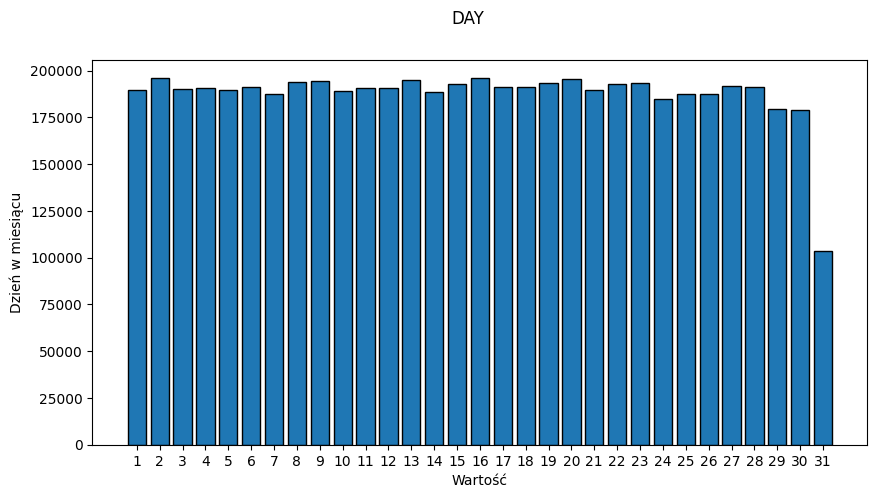

In [19]:
print('MONTH:', df_flights.MONTH.unique())
print('DAY:', df_flights.DAY.unique())
print('DAY_OF_WEEK:', df_flights.DAY_OF_WEEK.unique())

value_counts = df_flights['DAY'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(value_counts.index, value_counts.values, edgecolor='k', )

plt.xticks(value_counts.index, labels=value_counts.index)

plt.suptitle('DAY')
plt.xlabel('Wartość')
plt.ylabel('Dzień w miesiącu')

plt.show()

In [20]:
df_flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [21]:
ones_count_CANCELLED = df_flights['CANCELLED'].sum()
print("Ilość jedynek w kolumnie 'CANCELLED':", ones_count_CANCELLED)

Ilość jedynek w kolumnie 'CANCELLED': 89884


*   ARRIVAL_DELAY
*   CANCELLATION_REASON
*   CANCELLED


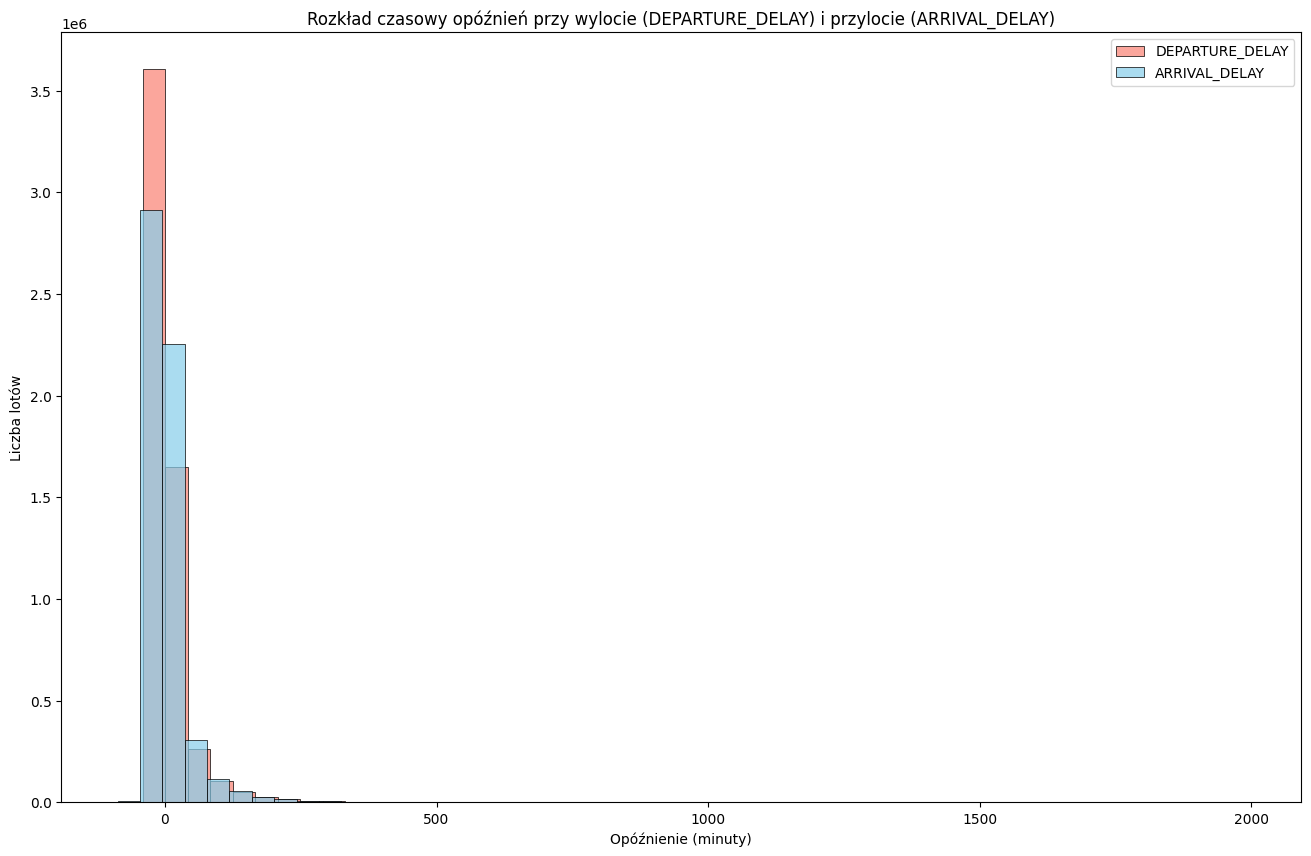

In [22]:
flights_no_missing_departure_delay = df_flights[df_flights['DEPARTURE_DELAY'].notna()]
flights_no_missing_arrival_delay = df_flights[df_flights['ARRIVAL_DELAY'].notna()]
plt.figure(figsize=(16, 10))
sns.histplot(flights_no_missing_departure_delay['DEPARTURE_DELAY'], bins=50, kde=False, color='salmon', edgecolor='black', linewidth=0.5, alpha=0.7, label='DEPARTURE_DELAY')
sns.histplot(flights_no_missing_arrival_delay['ARRIVAL_DELAY'], bins=50, kde=False, color='skyblue', edgecolor='black', linewidth=0.5, alpha=0.7, label='ARRIVAL_DELAY')
plt.title('Rozkład czasowy opóźnień przy wylocie (DEPARTURE_DELAY) i przylocie (ARRIVAL_DELAY)')
plt.xlabel('Opóźnienie (minuty)')
plt.ylabel('Liczba lotów')
plt.legend()
plt.show()

In [23]:
flights = df_flights.copy()

In [24]:
departure_delayed_flights = (flights['DEPARTURE_DELAY'] > 0).sum()
departure_advanced_flights = (flights['DEPARTURE_DELAY'] < 0).sum()
departure_on_time_flights = (flights['DEPARTURE_DELAY'] == 0).sum()
departure_missing_value = flights['DEPARTURE_DELAY'].isna().sum()

In [25]:
arrival_delayed_flights = (flights['ARRIVAL_DELAY'] > 0).sum()
arrival_advanced_flights = (flights['ARRIVAL_DELAY'] < 0).sum()
arrival_on_time_flights = (flights['ARRIVAL_DELAY'] == 0).sum()
arrival_missing_value = flights['ARRIVAL_DELAY'].isna().sum()

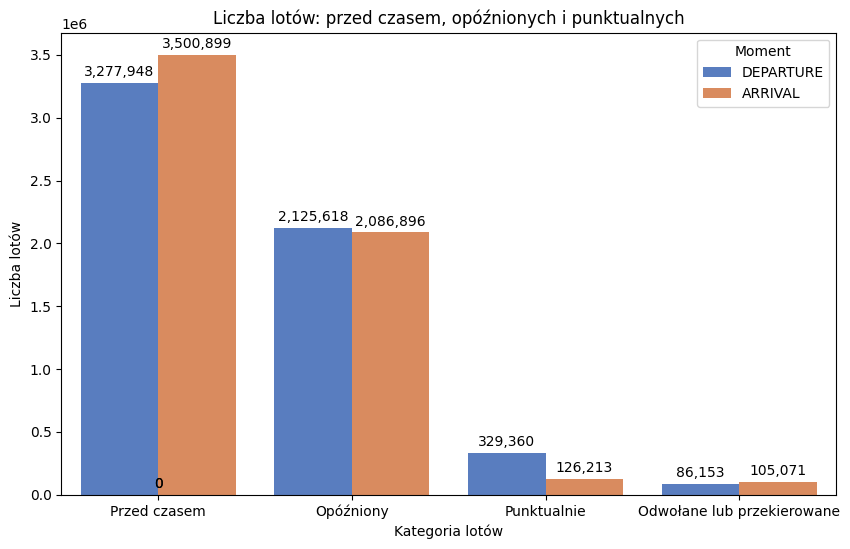

In [26]:
departure_categories = ['Przed czasem', 'Opóźniony', 'Punktualnie', 'Odwołane lub przekierowane']
departure_values = [departure_advanced_flights, departure_delayed_flights, departure_on_time_flights, departure_missing_value]
arrival_values = [arrival_advanced_flights, arrival_delayed_flights, arrival_on_time_flights, arrival_missing_value]

df = pd.DataFrame({
    'Kategoria': departure_categories * 2,
    'Liczba lotów': departure_values + arrival_values,
    'Moment': ['DEPARTURE'] * len(departure_categories) + ['ARRIVAL'] * len(arrival_values)})

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Kategoria', y='Liczba lotów', hue='Moment', data=df, palette='muted', errorbar=None)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Liczba lotów: przed czasem, opóźnionych i punktualnych')
plt.xlabel('Kategoria lotów')
plt.ylabel('Liczba lotów')
plt.show()

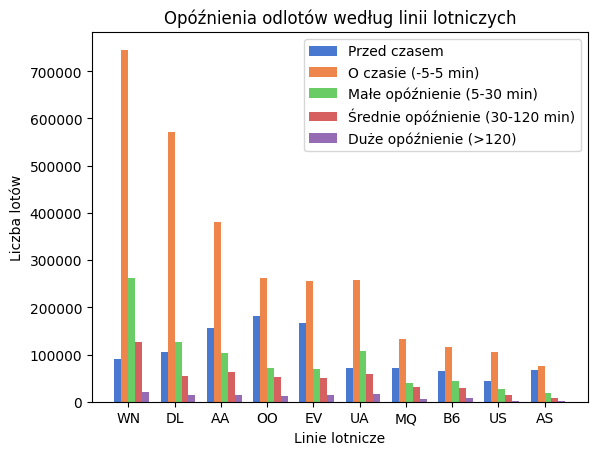

In [27]:
top_airlines = flights['AIRLINE'].value_counts().head(10).index

categories = ['Przed czasem', 'O czasie (-5-5 min)', 'Małe opóźnienie (5-30 min)', 'Średnie opóźnienie (30-120 min)', 'Duże opóźnienie (>120)']

sns.set_palette("muted")

data = []

for airline in top_airlines:
    delays = flights[flights['AIRLINE'] == airline]['DEPARTURE_DELAY']
    early = delays[delays < -5].count()
    on_time = delays[(delays >= -5) & (delays <= 5)].count()
    small_delay = delays[(delays > 5) & (delays <= 30)].count()
    medium_delay = delays[(delays > 30) & (delays <= 120)].count()
    large_delay = delays[delays > 120].count()

    data.append([early, on_time, small_delay, medium_delay, large_delay])

data = np.array(data)

bar_width = 0.15
bar_positions = np.arange(len(top_airlines))

for i in range(5):
    plt.bar(bar_positions + i * bar_width, data[:, i], bar_width, label=categories[i])

plt.xlabel('Linie lotnicze')
plt.ylabel('Liczba lotów')
plt.title('Opóźnienia odlotów według linii lotniczych')
plt.xticks(bar_positions + 1.5 * bar_width, top_airlines)
plt.legend()

plt.show()

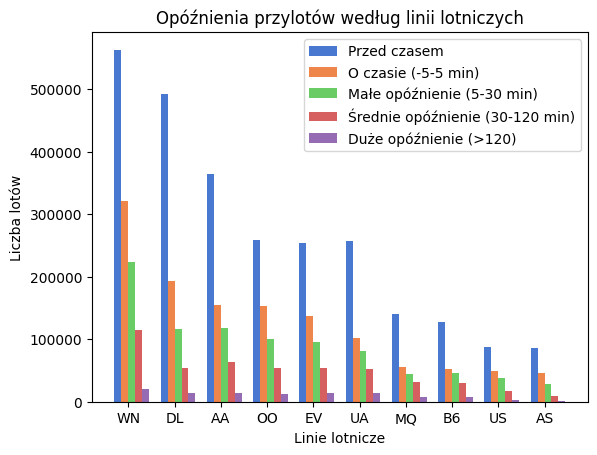

In [28]:
top_airlines = flights['AIRLINE'].value_counts().head(10).index

categories = ['Przed czasem', 'O czasie (-5-5 min)', 'Małe opóźnienie (5-30 min)', 'Średnie opóźnienie (30-120 min)', 'Duże opóźnienie (>120)']

sns.set_palette("muted")

data = []

for airline in top_airlines:
    delays = flights[flights['AIRLINE'] == airline]['ARRIVAL_DELAY']
    early = delays[delays < -5].count()
    on_time = delays[(delays >= -5) & (delays <= 5)].count()
    small_delay = delays[(delays > 5) & (delays <= 30)].count()
    medium_delay = delays[(delays > 30) & (delays <= 120)].count()
    large_delay = delays[delays > 120].count()

    data.append([early, on_time, small_delay, medium_delay, large_delay])

data = np.array(data)

bar_width = 0.15
bar_positions = np.arange(len(top_airlines))

for i in range(5):
    plt.bar(bar_positions + i * bar_width, data[:, i], bar_width, label=categories[i])

plt.xlabel('Linie lotnicze')
plt.ylabel('Liczba lotów')
plt.title('Opóźnienia przylotów według linii lotniczych')
plt.xticks(bar_positions + 1.5 * bar_width, top_airlines)
plt.legend()

plt.show()

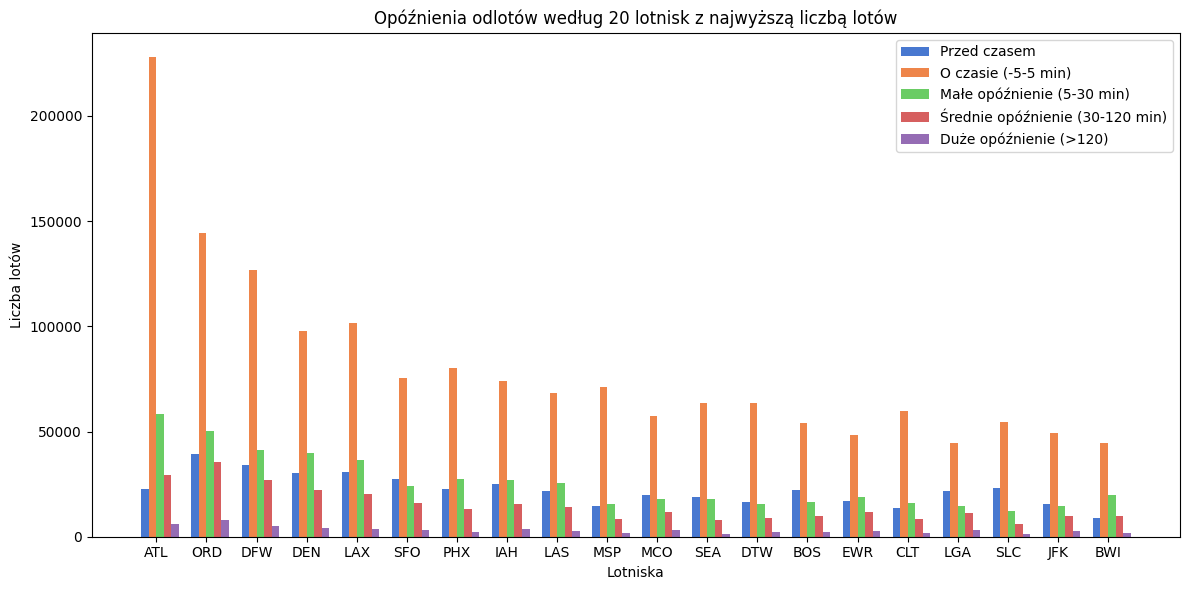

In [29]:
plt.figure(figsize=(12, 6))

top_airports = flights['ORIGIN_AIRPORT'].value_counts().head(20).index
categories = ['Przed czasem', 'O czasie (-5-5 min)', 'Małe opóźnienie (5-30 min)', 'Średnie opóźnienie (30-120 min)', 'Duże opóźnienie (>120)']

sns.set_palette("muted")
data = []

for airport in top_airports:
    delays = flights[flights['ORIGIN_AIRPORT'] == airport]['DEPARTURE_DELAY']
    early = delays[delays < -5].count()
    on_time = delays[(delays >= -5) & (delays <= 5)].count()
    small_delay = delays[(delays > 5) & (delays <= 30)].count()
    medium_delay = delays[(delays > 30) & (delays <= 120)].count()
    large_delay = delays[delays > 120].count()

    data.append([early, on_time, small_delay, medium_delay, large_delay])

data = np.array(data)

bar_width = 0.15
bar_positions = np.arange(len(top_airports))

for i in range(5):
    plt.bar(bar_positions + i * bar_width, data[:, i], bar_width, label=categories[i])

plt.xlabel('Lotniska')
plt.ylabel('Liczba lotów')
plt.title('Opóźnienia odlotów według 20 lotnisk z najwyższą liczbą lotów')
plt.xticks(bar_positions + 1.5 * bar_width, top_airports)
plt.legend()
plt.tight_layout()

plt.show()

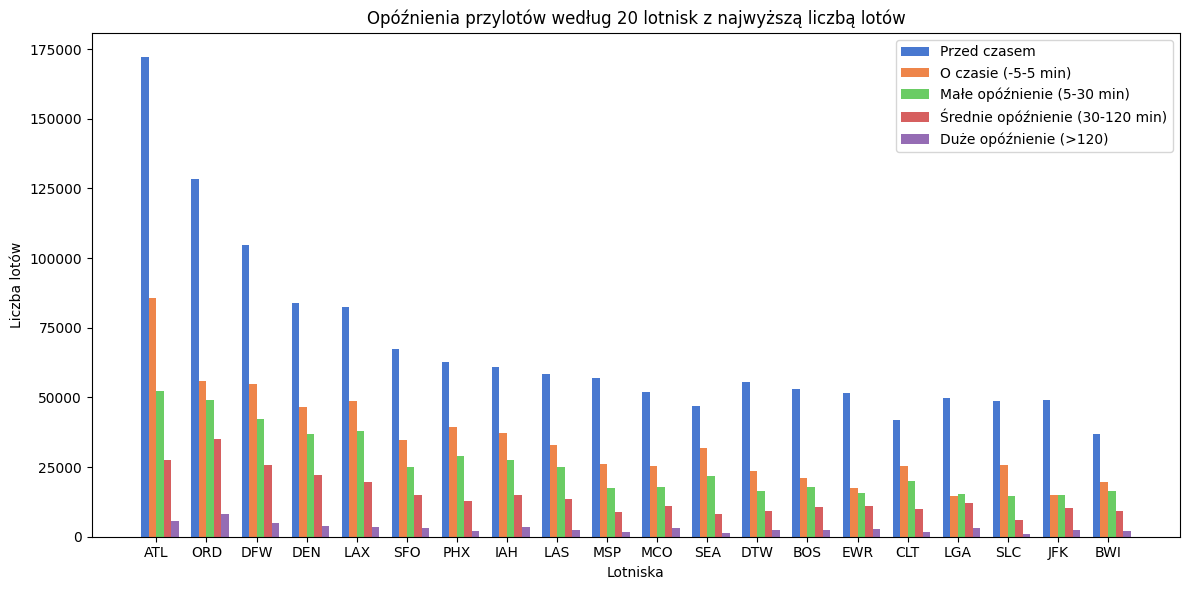

In [30]:
plt.figure(figsize=(12, 6))

top_airports = flights['ORIGIN_AIRPORT'].value_counts().head(20).index
categories = ['Przed czasem', 'O czasie (-5-5 min)', 'Małe opóźnienie (5-30 min)', 'Średnie opóźnienie (30-120 min)', 'Duże opóźnienie (>120)']

sns.set_palette("muted")
data = []

for airport in top_airports:
    delays = flights[flights['ORIGIN_AIRPORT'] == airport]['ARRIVAL_DELAY']
    early = delays[delays < -5].count()
    on_time = delays[(delays >= -5) & (delays <= 5)].count()
    small_delay = delays[(delays > 5) & (delays <= 30)].count()
    medium_delay = delays[(delays > 30) & (delays <= 120)].count()
    large_delay = delays[delays > 120].count()

    data.append([early, on_time, small_delay, medium_delay, large_delay])

data = np.array(data)

bar_width = 0.15
bar_positions = np.arange(len(top_airports))

for i in range(5):
    plt.bar(bar_positions + i * bar_width, data[:, i], bar_width, label=categories[i])

plt.xlabel('Lotniska')
plt.ylabel('Liczba lotów')
plt.title('Opóźnienia przylotów według 20 lotnisk z najwyższą liczbą lotów')
plt.xticks(bar_positions + 1.5 * bar_width, top_airports)
plt.legend()
plt.tight_layout()

plt.show()

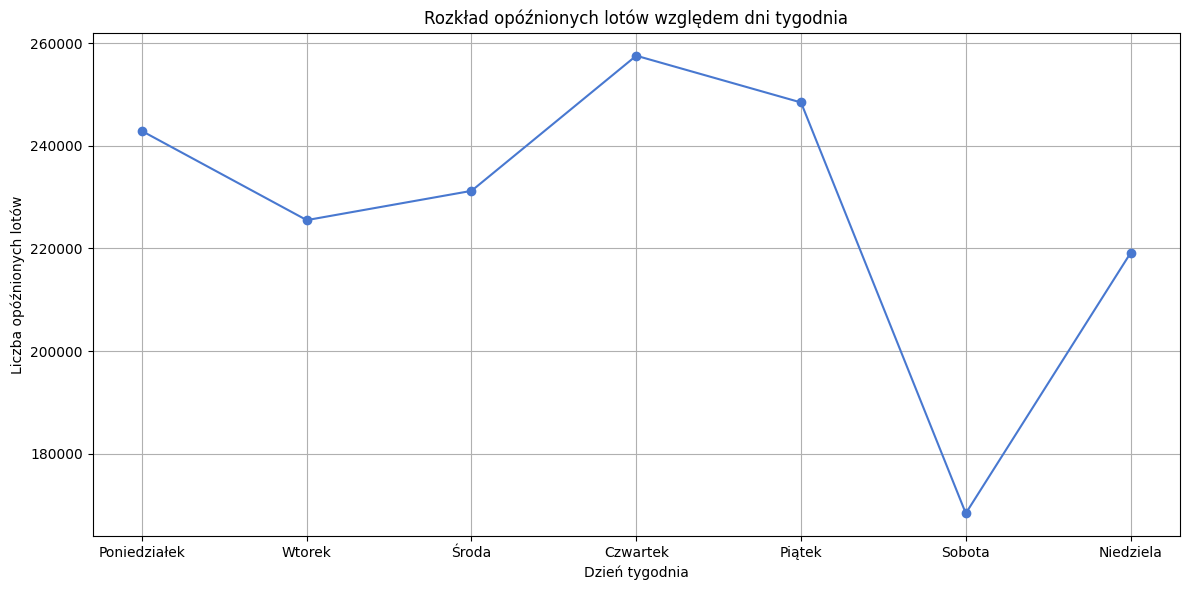

In [31]:
days_of_week = ['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek', 'Sobota', 'Niedziela']
daily_delays = flights[flights['ARRIVAL_DELAY'] > 5].groupby('DAY_OF_WEEK').size()

plt.figure(figsize=(12, 6))
plt.plot(days_of_week, daily_delays.values, marker='o', linestyle='-')

plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba opóźnionych lotów')
plt.title('Rozkład opóźnionych lotów względem dni tygodnia')

plt.grid(True)
plt.tight_layout()

plt.show()

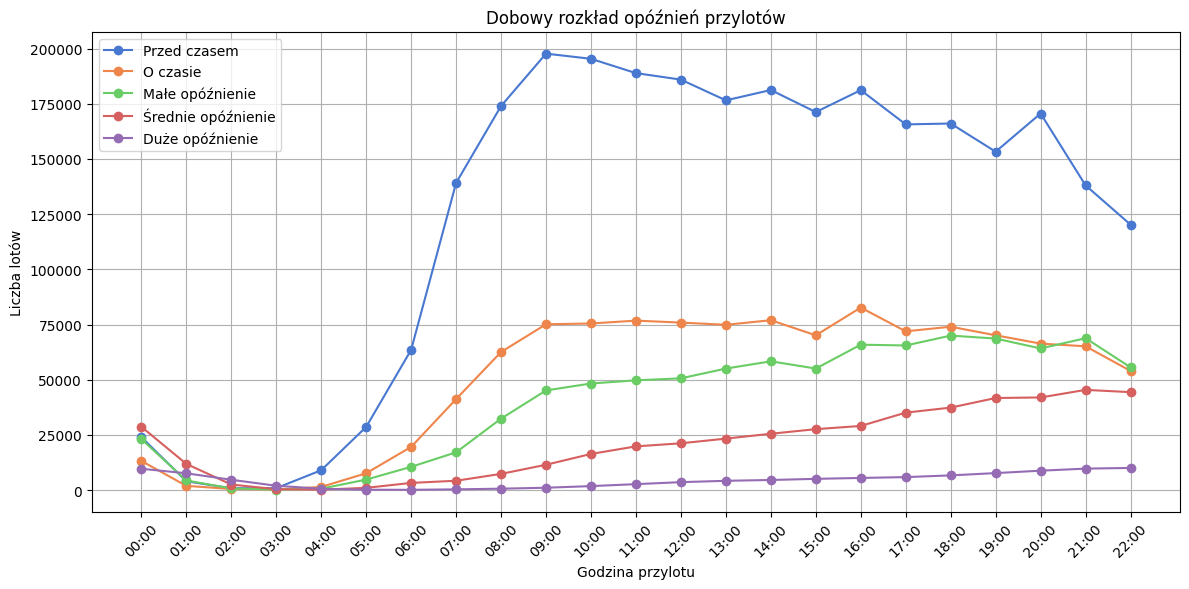

In [32]:
flights = flights.sort_values('ARRIVAL_TIME')

time_bins = range(0, 2400, 100)

early_arrivals = flights[flights['ARRIVAL_DELAY'] <= -5]['ARRIVAL_TIME'].groupby(
    pd.cut(flights['ARRIVAL_TIME'], bins=time_bins)).size()

on_time_arrivals = flights[(flights['ARRIVAL_DELAY'] > -5) & (flights['ARRIVAL_DELAY'] <= 5)]['ARRIVAL_TIME'].groupby(
    pd.cut(flights['ARRIVAL_TIME'], bins=time_bins)).size()

small_delays = flights[(flights['ARRIVAL_DELAY'] > 5) & (flights['ARRIVAL_DELAY'] <= 30)]['ARRIVAL_TIME'].groupby(
    pd.cut(flights['ARRIVAL_TIME'], bins=time_bins)).size()

medium_delays = flights[(flights['ARRIVAL_DELAY'] > 30) & (flights['ARRIVAL_DELAY'] <= 120)]['ARRIVAL_TIME'].groupby(
    pd.cut(flights['ARRIVAL_TIME'], bins=time_bins)).size()

big_delays = flights[flights['ARRIVAL_DELAY'] > 120]['ARRIVAL_TIME'].groupby(
    pd.cut(flights['ARRIVAL_TIME'], bins=time_bins)).size()

bin_centers = [int(interval.mid) for interval in early_arrivals.index]

hour_labels = [f'{hour // 100:02d}:00' for hour in bin_centers]

plt.figure(figsize=(12, 6))
plt.plot(bin_centers, early_arrivals.values, marker='o', linestyle='-', label='Przed czasem')
plt.plot(bin_centers, on_time_arrivals.values, marker='o', linestyle='-', label='O czasie')
plt.plot(bin_centers, small_delays.values, marker='o', linestyle='-', label='Małe opóźnienie')
plt.plot(bin_centers, medium_delays.values, marker='o', linestyle='-', label='Średnie opóźnienie')
plt.plot(bin_centers, big_delays.values, marker='o', linestyle='-', label='Duże opóźnienie')
plt.xlabel('Godzina przylotu')
plt.ylabel('Liczba lotów')
plt.title('Dobowy rozkład opóźnień przylotów')
plt.xticks(bin_centers, hour_labels, rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()